In [1]:
import warnings
warnings.filterwarnings('ignore')

import time  # , shutil
import numpy as np
import pandas as pd
from datetime import date

import matplotlib
import matplotlib.pyplot as plt
from pylab import imshow

import pickle  # , h5py
import sys, os, os.path


sys.path.append("/Users/hn/Documents/00_GitHub/Ag/NASA/Python_codes/")
import NASA_core as nc

In [2]:
data_dir_ = "/Users/hn/Documents/01_research_data/Amin/Joel/"

In [3]:
data_2022_nofilter = pd.read_csv(data_dir_ + "data_2022_nofilter.csv")
data_2023_nofilter = pd.read_csv(data_dir_ + "data_2023_nofilter.csv")
data_2023_nofilter.head(2)

,Unnamed: 0,ID,prob_single,Acres,county,CropTyp,DataSrc,Irrigtn,LstSrvD,label
0,0,20985,1.0,10,Grant,Apple,WSDA,micro-sprinkler,2023/04/26 00:00:00.000,single-cropped
1,1,20986,1.0,14,Grant,Apple,WSDA,sprinkler,2023/04/25 00:00:00.000,single-cropped


In [4]:
print (f"{data_2022_nofilter.shape = }")
print (f"{data_2023_nofilter.shape = }")

data_2022_nofilter.shape = (76526, 10)
data_2023_nofilter.shape = (76016, 10)


In [5]:
print (f"{len(data_2022_nofilter.ID.unique()) = }")
print (f"{len(data_2023_nofilter.ID.unique()) = }")

len(data_2022_nofilter.ID.unique()) = 76526
len(data_2023_nofilter.ID.unique()) = 76016


In [6]:
data_2022_nofilter.head(2)

,Unnamed: 0,ID,prob_single,Acres,county,CropTyp,DataSrc,Irrigtn,LstSrvD,label
0,0,144261,1.0,2,Spokane,Developed,WSDA,sprinkler,2022/05/04 00:00:00.000,single-cropped
1,1,144262,1.0,2,Spokane,"Fallow, Idle",WSDA,sprinkler,2022/08/05 00:00:00.000,single-cropped


In [7]:
data_2022_nofilter.drop(columns=['Unnamed: 0'], inplace=True)
data_2023_nofilter.drop(columns=['Unnamed: 0'], inplace=True)
data_2023_nofilter.head(2)


,ID,prob_single,Acres,county,CropTyp,DataSrc,Irrigtn,LstSrvD,label
0,20985,1.0,10,Grant,Apple,WSDA,micro-sprinkler,2023/04/26 00:00:00.000,single-cropped
1,20986,1.0,14,Grant,Apple,WSDA,sprinkler,2023/04/25 00:00:00.000,single-cropped


### Rename column names: lower case for consistency

In [8]:
data_2022_nofilter.rename(columns=lambda x: x.lower().replace(" ", "_"), inplace=True)
data_2023_nofilter.rename(columns=lambda x: x.lower().replace(" ", "_"), inplace=True)

data_2023_nofilter.head(2)

,id,prob_single,acres,county,croptyp,datasrc,irrigtn,lstsrvd,label
0,20985,1.0,10,Grant,Apple,WSDA,micro-sprinkler,2023/04/26 00:00:00.000,single-cropped
1,20986,1.0,14,Grant,Apple,WSDA,sprinkler,2023/04/25 00:00:00.000,single-cropped


### Sort by ID

In [9]:
data_2022_nofilter.sort_values(by=["id"], inplace=True)
data_2023_nofilter.sort_values(by=["id"], inplace=True)

data_2022_nofilter.reset_index(drop=True, inplace=True)
data_2023_nofilter.reset_index(drop=True, inplace=True)

data_2023_nofilter.head(2)

,id,prob_single,acres,county,croptyp,datasrc,irrigtn,lstsrvd,label
0,1,1.0,15,Adams,Apple,WSDA,drip/micro-sprinkler,2022/09/13 00:00:00.000,single-cropped
1,2,1.0,11,Adams,Apple,WSDA,drip/micro-sprinkler,2022/09/13 00:00:00.000,single-cropped


### Convert type of lstsrvd from string to date

In [10]:
data_2022_nofilter.lstsrvd = pd.to_datetime(data_2022_nofilter.lstsrvd)

data_2023_nofilter.lstsrvd = pd.to_datetime(data_2023_nofilter.lstsrvd)
data_2023_nofilter.head(2)

,id,prob_single,acres,county,croptyp,datasrc,irrigtn,lstsrvd,label
0,1,1.0,15,Adams,Apple,WSDA,drip/micro-sprinkler,2022-09-13,single-cropped
1,2,1.0,11,Adams,Apple,WSDA,drip/micro-sprinkler,2022-09-13,single-cropped


In [11]:
data_2022_nofilter["last_survey_year"] = data_2022_nofilter.lstsrvd.dt.year
data_2023_nofilter["last_survey_year"] = data_2023_nofilter.lstsrvd.dt.year
data_2023_nofilter.head(2)

,id,prob_single,acres,county,croptyp,datasrc,irrigtn,lstsrvd,label,last_survey_year
0,1,1.0,15,Adams,Apple,WSDA,drip/micro-sprinkler,2022-09-13,single-cropped,2022
1,2,1.0,11,Adams,Apple,WSDA,drip/micro-sprinkler,2022-09-13,single-cropped,2022


In [12]:
data_2022_nofilter["image_year"] = 2022
data_2023_nofilter["image_year"] = 2023

data_2023_nofilter.head(2)

,id,prob_single,acres,county,croptyp,datasrc,irrigtn,lstsrvd,label,last_survey_year,image_year
0,1,1.0,15,Adams,Apple,WSDA,drip/micro-sprinkler,2022-09-13,single-cropped,2022,2023
1,2,1.0,11,Adams,Apple,WSDA,drip/micro-sprinkler,2022-09-13,single-cropped,2022,2023


In [13]:
data_2022_surveyFilter = data_2022_nofilter[data_2022_nofilter.last_survey_year == \
                                            data_2022_nofilter.image_year].copy()


data_2023_surveyFilter = data_2023_nofilter[data_2023_nofilter.last_survey_year == \
                                            data_2023_nofilter.image_year].copy()

data_2023_surveyFilter.head(2)

,id,prob_single,acres,county,croptyp,datasrc,irrigtn,lstsrvd,label,last_survey_year,image_year
69,206,1.0,46,Douglas,"Corn, Field",WSDA,center pivot,2023-06-14,single-cropped,2023,2023
82,247,1.0,120,Adams,Potato,WSDA,center pivot,2023-08-08,single-cropped,2023,2023


In [22]:
print (f"{data_2022_nofilter.shape = }")
print (f"{data_2022_surveyFilter.shape = }")
print ()
print (f"{data_2023_nofilter.shape = }")
print (f"{data_2023_surveyFilter.shape = }")

data_2022_nofilter.shape = (76526, 11)
data_2022_surveyFilter.shape = (9567, 11)

data_2023_nofilter.shape = (76016, 11)
data_2023_surveyFilter.shape = (31772, 11)


# Create (at least) 4 tables

Two tables for each year

- One table say how many/acres are double cropped in general.
- One table say how many/acres are double cropped using proper survey date so that they can dive in and see things based on crop-type and whatnot!!!
- Extra tables can have crop types in it as well.

### General tables 2022

In [42]:
print ("total acre is [{}].".format(data_2022_nofilter["acres"].sum()))

total acre is [1865935].


In [39]:
pd.DataFrame(data_2022_nofilter.groupby("label")["id"].count()).reset_index()

,label,id
0,double-cropped,1163
1,single-cropped,75363


In [40]:
pd.DataFrame(data_2022_nofilter.groupby("label")["acres"].sum()).reset_index()

,label,acres
0,double-cropped,73977
1,single-cropped,1791958


##### General tables 2022: counties

In [84]:
field_count_counties = pd.DataFrame(data_2022_nofilter.groupby(["county"])["id"].count()).reset_index()
field_count_counties.rename(columns={"id":"total_field_count"}, inplace=True)

field_acr_counties = pd.DataFrame(data_2022_nofilter.groupby(["county"])["acres"].sum()).reset_index()
field_acr_counties.rename(columns={"id":"acres"}, inplace=True)

county_field_countAcr = pd.merge(field_count_counties, field_acr_counties, on=['county'], how='left')
county_field_countAcr.head(2)

,county,total_field_count,acres
0,Adams,3129,170981
1,Asotin,82,408


In [85]:
data_2022_nofilter_labelCounts = pd.DataFrame(data_2022_nofilter.groupby(["county", "label"])\
                                              ["id"].count()).reset_index()
data_2022_nofilter_labelCounts.rename(columns={"id":"field_count"}, inplace=True)
data_2022_nofilter_labelCounts.head(2)

data_2022_nofilter_labelAcr = pd.DataFrame(data_2022_nofilter.groupby(["county", "label"])\
                                              ["acres"].sum()).reset_index()
data_2022_nofilter_labelAcr.head(2)

county_field_labelsCountAcr_2022 = pd.merge(data_2022_nofilter_labelAcr, data_2022_nofilter_labelCounts, 
                                            on=['county', "label"], how='left')
county_field_labelsCountAcr_2022.head(2)

,county,label,acres,field_count
0,Adams,double-cropped,6339,124
1,Adams,single-cropped,164642,3005


In [111]:
tick_legend_FontSize = 10

params = {'legend.fontsize': tick_legend_FontSize, # medium, large
          # 'figure.figsize': (6, 4),
          'axes.labelsize': tick_legend_FontSize*1.2,
          'axes.titlesize': tick_legend_FontSize*1.3,
          'xtick.labelsize': tick_legend_FontSize, #  * 0.75
          'ytick.labelsize': tick_legend_FontSize, #  * 0.75
          'axes.titlepad': 10}

plt.rc('font', family = 'Palatino')
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update(params)

color_dict = {"single": "#DDCC77",
              "double": "#332288",
             }

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (20,) and arg 1 with shape (12,).

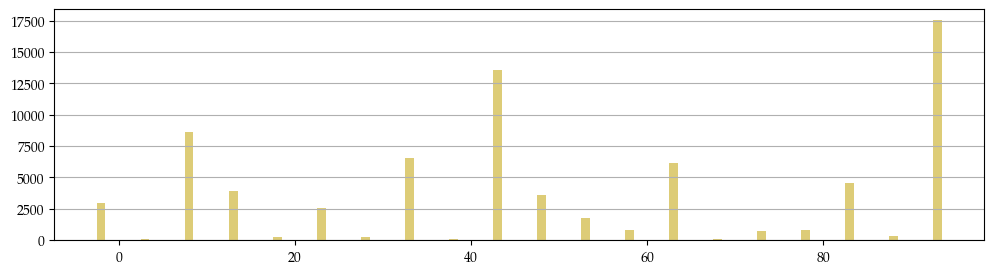

In [133]:
df = county_field_labelsCountAcr_2022.copy()
df_single = df[df.label == "single-cropped"].copy()
df_double = df[df.label == "double-cropped"].copy()

df_single.sort_values(by=["county"], inplace=True)
df_double.sort_values(by=["county"], inplace=True)

df_single.reset_index(drop=True, inplace=True)
df_double.reset_index(drop=True, inplace=True)
plot_col = "field_count"
#########################################################

fig, axs = plt.subplots(1, 1, figsize=(12, 3), sharex=False, # sharey='col', # sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.35, 'wspace': .05});
axs.grid(axis='y', which='both')

X_axis = np.arange(len(df.county.unique()))

bar_width_ = 1
step_size_ = 5*bar_width_
X_axis = np.array(range(0, step_size_*len(df.county.unique()), step_size_))

axs.bar(X_axis - bar_width_*2, df_single[plot_col], color = color_dict["single"], 
        width = bar_width_, label="single")

axs.bar(X_axis - bar_width_, df_double[plot_col], color = color_dict["double"], 
        width = bar_width_, label="double")

axs.tick_params(axis='x', labelrotation = 90)
axs.set_xticks(X_axis, df_single.county)

axs.set_ylabel(plot_col)
# axs.set_xlabel("crop type")
# axs.set_title("5-step NDVI")
# axs.set_ylim([0, 105])
axs.legend(loc="best");
axs.xaxis.set_ticks_position('none')

# send the guidelines to the back
ymin, ymax = axs.get_ylim()
axs.set(ylim=(ymin-1, ymax+25), axisbelow=True);


In [140]:
county_field_labelsCountAcr_2022.head(1)

,county,label,acres,field_count
0,Adams,double-cropped,6339,124


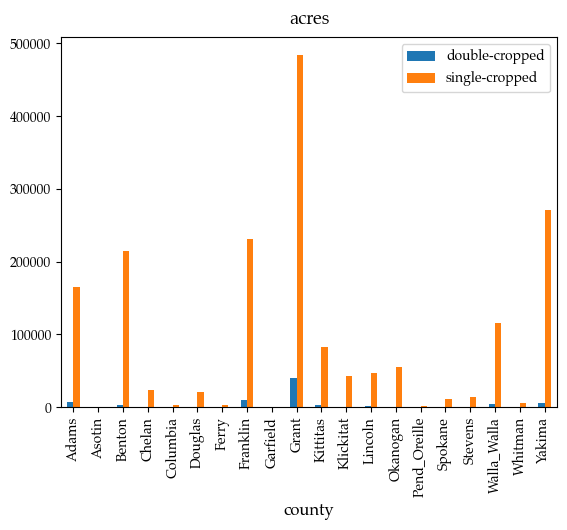

In [202]:
plot_col = "acres"
df = county_field_labelsCountAcr_2022.copy()
df = df.pivot(index='county', columns='label', values=plot_col).reset_index(drop=False)
df.columns = df.columns.values
df.plot(x='county', kind='bar', stacked=False, title=plot_col);

In [232]:
import plotly.express as px
fig = px.bar(county_field_labelsCountAcr_2022, 
             x="county", y="acres",
             color='label', barmode='group',text="acres",
             height=400)

fig.update_xaxes(categoryorder='array', 
                 categoryarray= county_field_labelsCountAcr_2022.county.unique())
fig.show()

In [215]:
county_field_labelsCountAcr_2022.head(2)

,county,label,acres,field_count
0,Adams,double-cropped,6339,124
1,Adams,single-cropped,164642,3005


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (20,) and arg 1 with shape (32,).

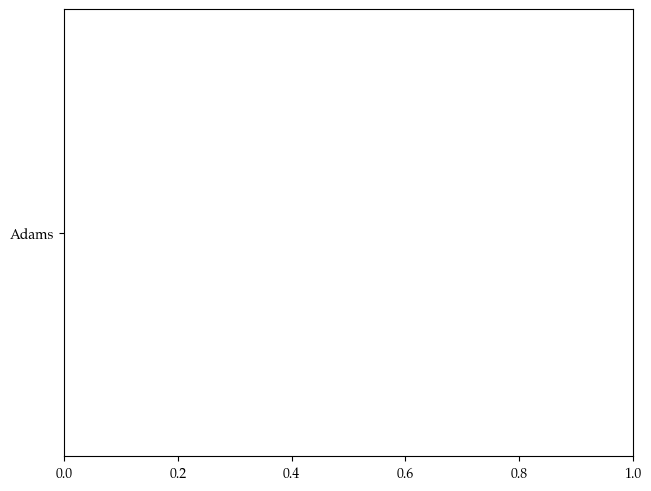

In [213]:
x = np.arange(len(county_field_labelsCountAcr_2022.county.unique())) # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in county_field_labelsCountAcr_2022.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

<generator object DataFrame.items at 0x348cf2040>

In [216]:
penguin_means

{'Bill Depth': (18.35, 18.43, 14.98),
 'Bill Length': (38.79, 48.83, 47.5),
 'Flipper Length': (189.95, 195.82, 217.19)}

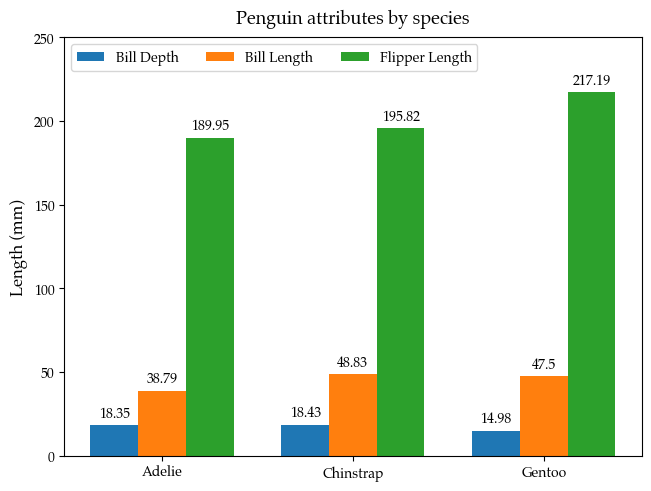

In [230]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
species = ["Adelie", "Chinstrap", "Gentoo"]
penguin_means = {
    'Bill Depth': [18.35, 18.43, 14.98],
    'Bill Length': [38.79, 48.83, 47.50],
    'Flipper Length': [189.95, 195.82, 217.19],
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

In [220]:
measurement

(189.95, 195.82, 217.19)

In [221]:
attribute

'Flipper Length'

In [228]:
type(species)

tuple

### General tables 2023

In [ ]:
print ("total acre is [{}].".format(data_2022_nofilter["acres"].sum()))

In [ ]:
pd.DataFrame(data_2023_nofilter.groupby("label")["id"].count()).reset_index()

In [ ]:
pd.DataFrame(data_2023_nofilter.groupby("label")["acres"].sum()).reset_index()

### Specific (filtered) tables 2022

In [53]:
L = len(data_2022_surveyFilter["id"].unique())
print ("total number of fields is [{}].".format(L))
print ("total acre is [{}].".format(data_2022_surveyFilter["acres"].sum()))

total number of fields is [9567].
total acre is [240961].


In [44]:
pd.DataFrame(data_2022_surveyFilter.groupby("label")["id"].count()).reset_index()

,label,id
0,double-cropped,129
1,single-cropped,9438


In [45]:
pd.DataFrame(data_2022_surveyFilter.groupby("label")["acres"].sum()).reset_index()

,label,acres
0,double-cropped,6610
1,single-cropped,234351


### Specific (filtered) tables 2023

In [ ]:
L = len(data_2023_surveyFilter["id"].unique())
print ("total number of fields is [{}].".format(L))
print ("total acre is [{}].".format(data_2023_surveyFilter["acres"].sum()))

In [ ]:
pd.DataFrame(data_2023_surveyFilter.groupby("label")["id"].count()).reset_index()

In [ ]:
pd.DataFrame(data_2023_surveyFilter.groupby("label")["acres"].sum()).reset_index()

# Crop Specific 2022

In [55]:
pd.DataFrame(data_2022_surveyFilter.groupby(["croptyp", "label"])["id"].count()).reset_index()

,croptyp,label,id
0,Alfalfa Hay,double-cropped,7
1,Alfalfa Hay,single-cropped,717
2,Alfalfa Seed,single-cropped,5
3,Alfalfa/Grass Hay,single-cropped,108
4,Apple,single-cropped,1156
...,...,...,...
99,Wheat Fallow,single-cropped,79
100,Wheat Hay,single-cropped,2
101,Wildlife Feed,single-cropped,29
102,Yellow Mustard,double-cropped,1


In [56]:
pd.DataFrame(data_2022_surveyFilter.groupby(["croptyp", "label"])["acres"].sum()).reset_index()

,croptyp,label,acres
0,Alfalfa Hay,double-cropped,437
1,Alfalfa Hay,single-cropped,24857
2,Alfalfa Seed,single-cropped,262
3,Alfalfa/Grass Hay,single-cropped,1825
4,Apple,single-cropped,10535
...,...,...,...
99,Wheat Fallow,single-cropped,7410
100,Wheat Hay,single-cropped,122
101,Wildlife Feed,single-cropped,192
102,Yellow Mustard,double-cropped,39


# Crop Specific 2023